# Random Signals and LTI-Systems

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Power Spectral Densitity

For a weakly stationary real-valued random process $x[k]$, the [power spectral density](../random_signals/power_spectral_densities.ipynb#Power-Spectral-Density) (PSD) $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ is given as the discrete-time Fourier transformation (DTFT) of the auto-correlation function (ACF) $\varphi_{xx}[\kappa]$

$$\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{\kappa = -\infty}^{\infty} \varphi_{xx}[\kappa] \; \mathrm{e}^{\,-\mathrm{j}\,\Omega\,\kappa} $$

Under the assumption of a real-valued LTI system with impulse response $h[k] \in \mathbb{R}$, the power spectral density (PSD) $\Phi_{yy}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of the output signal of an LTI system $y[k] = \mathcal{H} \{ x[k] \}$ is derived by the DTFT of the [ACF of the output signal](../random_signals_LTI_systems/correlation_functions.ipynb#Auto-Correlation-Function) $\varphi_{yy}[\kappa]$

\begin{align}
\Phi_{yy}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) &= \sum_{\kappa = -\infty}^{\infty} \underbrace{h[\kappa] * h[-\kappa]}_{\varphi_{hh}[\kappa]} * \varphi_{xx}[\kappa] \; \mathrm{e}^{\,-\mathrm{j}\,\Omega\,\kappa} \\ 
&= H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot H(\mathrm{e}^{\,-\mathrm{j}\,\Omega}) \cdot \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = | H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) |^2 \cdot \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})
\end{align}

The PSD of the output signal $\Phi_{yy}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of an LTI system is given by the  PSD of the input signal $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ multiplied with the squared magnitude $| H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) |^2$ of the transfer function of the system.

## Cross-Power Spectral Densities

The cross-power spectral densities $\Phi_{yx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ and $\Phi_{xy}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ between the in- and output of an LTI system are given by the DTFT of the [cross-correlation functions](../random_signals_LTI_systems/correlation_functions.ipynb#Cross-Correlation-Function) (CCF) $\varphi_{yx}[\kappa]$ and $\varphi_{xy}[\kappa]$. Hence,

$$\Phi_{yx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{\kappa = -\infty}^{\infty} h[\kappa] * \varphi_{xx}[\kappa] \; \mathrm{e}^{\,-\mathrm{j}\,\Omega\,\kappa} = \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$$

and

$$\Phi_{xy}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{\kappa = -\infty}^{\infty} h[-\kappa] * \varphi_{xx}[\kappa] \; \mathrm{e}^{\,-\mathrm{j}\,\Omega\,\kappa} = \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot H(\mathrm{e}^{\,-\mathrm{j}\,\Omega})$$

## System Identification by Spectral Division

Using the result above for the cross-power spectral density $\Phi_{yx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ between out- and input, and the relation of the [CCF of finite-length signals to the convolution](../random_signals/correlation_functions.ipynb#Definition) one yields

$$
H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{\Phi_{yx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})}{\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})} = \frac{\frac{1}{K} Y(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot X(\mathrm{e}^{\,-\mathrm{j}\,\Omega})}{\frac{1}{K} X(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \cdot X(\mathrm{e}^{\,-\mathrm{j}\,\Omega})} 
= \frac{Y(\mathrm{e}^{\,\mathrm{j}\,\Omega})}{X(\mathrm{e}^{\,\mathrm{j}\,\Omega})}
$$

holding for $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \neq 0$ and $X(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \neq 0$. Hence, the transfer function $H(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of an unknown system can be derived by dividing the spectrum of the output signal $Y(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ through the spectrum of the input signal $X(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. This is equal to the [definition of the transfer function](https://en.wikipedia.org/wiki/Transfer_function). However, care has to be taken that the spectrum of the input signal does not contain zeros.

Above relation can be realized by the discrete Fourier transformation (DFT) by taking into account that a multiplication of two spectra $X[\mu] \cdot Y[\mu]$ results in the cyclic/periodic convolution $x[k] \circledast y[k]$. Since we aim at a linear convolution, zero-padding of the in- and output signal has to be applied.

### Example

We consider the estimation of the impulse response $h[k] = \mathcal{F}_*^{-1} \{ H(\mathrm{e}^{\,\mathrm{j}\,\Omega}) \}$ of an unknown system using the spectral division method. Normal distributed white noise with variance $\sigma_n^2 = 1$ is used as input signal $x[k]$. In order to show the effect of sensor noise, normally distributed white noise $n[k]$ with the variance $\sigma_n^2 = 0.01$ is added to the output signal $y[k] = x[k] * h[k] + n[k]$.

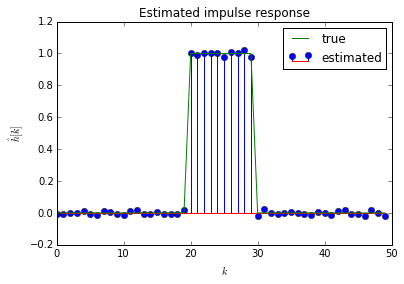

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


N = 1000  # number of samples for input signal

# generate input signal
x = np.random.normal(size=N, scale=1)  # normal distributed (zero-mean, unit-variance) white noise
# impulse response of the system
h = np.concatenate((np.zeros(20), np.ones(10), np.zeros(20)))
# output signal by convolution
y = np.convolve(h, x, mode='full')
# add noise to the output signal
y = y + np.random.normal(size=y.shape, scale=.1)

# zero-padding of input signal
x = np.concatenate((x, np.zeros(len(h)-1)))
# estimate transfer function
H = np.fft.rfft(y)/np.fft.rfft(x)
# compute inpulse response
he = np.fft.irfft(H)
he = he[0:len(h)]

# plot impulse response
plt.figure()
plt.stem(he, label='estimated')
plt.plot(h, 'g-', label='true')
plt.title('Estimated impulse response')
plt.xlabel(r'$k$')
plt.ylabel(r'$\hat{h}[k]$')
plt.legend();

**Exercise**

* Change the length `N` of the input signal. What happens?
* Change the variance $\sigma_n^2$ of the additive noise. What happens?

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>